In [ ]:
! pip install kaggle

!pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached opendatasets-0.1.22-py3-none-any.whl (15 kB)


In [ ]:
import opendatasets as od
import pandas

In [ ]:
od.download("https://www.kaggle.com/datasets/ssarkar445/covid-19-xray-and-ct-scan-image-dataset?datasetId=1074124")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aminrezakhajeheydari
Your Kaggle Key: ··········


100%|██████████| 3.74G/3.74G [02:44<00:00, 24.4MB/s]


In [ ]:
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 439 kB 75.6 MB/s 
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
     |████████████████████████████████| 6.0 MB 58.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
#from keras.models import Model,Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications import DenseNet121

In [ ]:
disease_types=['COVID', 'Non-COVID']
data_dir = '/content/covid-19-xray-and-ct-scan-image-dataset/COVID-19-Dataset/CT'
train_dir = os.path.join(data_dir)

In [ ]:
train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
        
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train.head()

,File,DiseaseID,Disease Type
0,COVID/Covid (372).png,0,COVID
1,COVID/coronacases_org_001_z279.png,0,COVID
2,COVID/radiopaedia_org_covid-19-pneumonia-10_85...,0,COVID
3,COVID/Covid (1151).png,0,COVID
4,COVID/Covid (504).png,0,COVID


In [ ]:
train


,File,DiseaseID,Disease Type
0,COVID/Covid (372).png,0,COVID
1,COVID/coronacases_org_001_z279.png,0,COVID
2,COVID/radiopaedia_org_covid-19-pneumonia-10_85...,0,COVID
3,COVID/Covid (1151).png,0,COVID
4,COVID/Covid (504).png,0,COVID
...,...,...,...
8050,Non-COVID/Non-Covid (555).png,1,Non-COVID
8051,Non-COVID/Non-Covid (75).png,1,Non-COVID
8052,Non-COVID/1.3.6.1.4.1.14519.5.2.1.6279.6001.21...,1,Non-COVID
8053,Non-COVID/1.3.6.1.4.1.14519.5.2.1.6279.6001.29...,1,Non-COVID


In [ ]:
SEED = 42
train = train.sample(frac=1, random_state=SEED) 
train.index = np.arange(len(train)) # Reset indices
train.head()

,File,DiseaseID,Disease Type
0,COVID/Covid (454).png,0,COVID
1,Non-COVID/Non-Covid (673).png,1,Non-COVID
2,COVID/coronacases_org_007_z190.png,0,COVID
3,Non-COVID/Non-Covid (630).png,1,Non-COVID
4,COVID/coronacases_org_001_z027.png,0,COVID


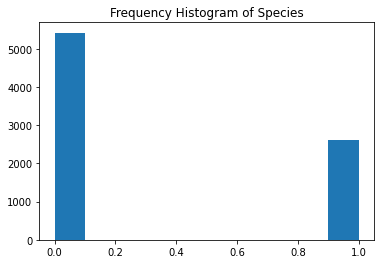

<Figure size 864x864 with 0 Axes>

In [ ]:
plt.hist(train['DiseaseID'])
plt.title('Frequency Histogram of Species')
plt.figure(figsize=(12, 12))
plt.show()


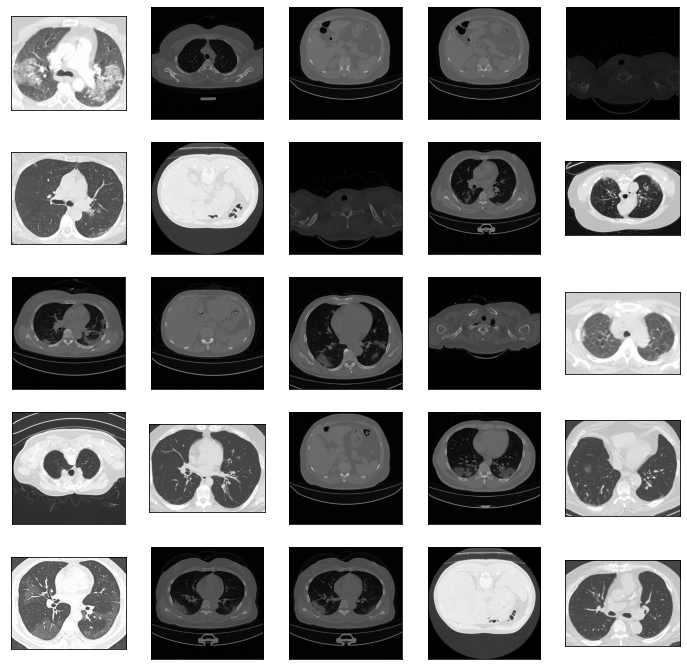

In [ ]:
def plot_defects(defect_types, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    defect_files = train['File'][train['Disease Type'] == defect_types].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, defect_files[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
plot_defects('COVID', 5, 5)

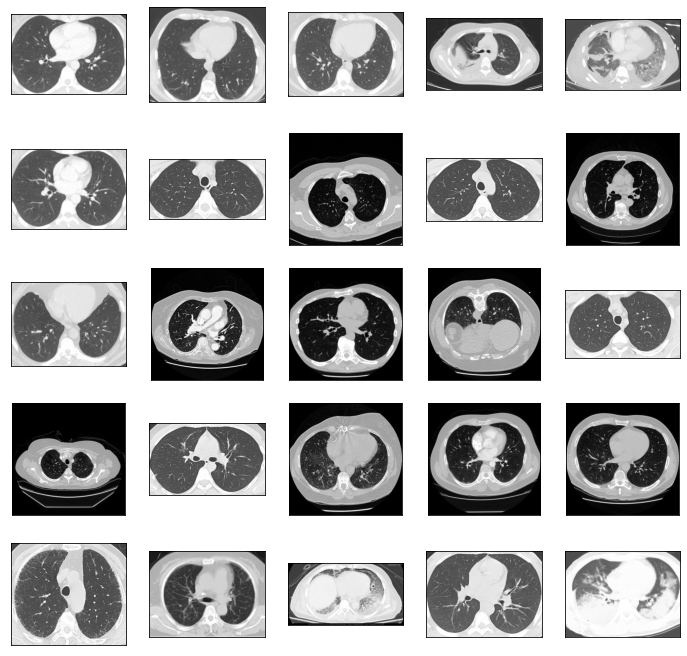

In [ ]:
def plot_defects(defect_types, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    defect_files = train['File'][train['Disease Type'] == defect_types].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, defect_files[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
plot_defects('Non-COVID', 5, 5)

In [ ]:
IMAGE_SIZE = 64
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) # Loading a color image is the default flag
# Resize image to target size
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

In [ ]:
X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
# Normalize the data
X_Train = X_train / 255.
print('Train Shape: {}'.format(X_Train.shape))


8055it [00:47, 169.59it/s]


Train Shape: (8055, 64, 64, 3)


In [ ]:
Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=2)

In [ ]:
BATCH_SIZE = 64

# Split the train and validation sets 
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.2, random_state=SEED)

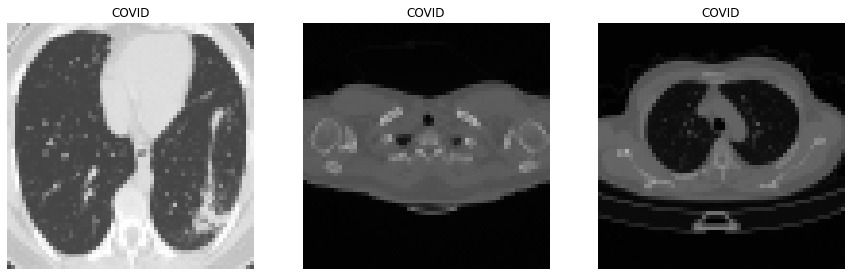

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
for i in range(3):
    ax[i].set_axis_off()
    ax[i].imshow(X_train[i])
    ax[i].set_title(disease_types[np.argmax(Y_train[i])])

In [ ]:
EPOCHS = 50
SIZE=64
N_ch=3

In [ ]:
model = Sequential()
model.add( Conv2D(3, (3, 3), padding='same', input_shape=(SIZE, SIZE, N_ch)))
model.add(DenseNet121(weights='imagenet', include_top=False))
model.add( GlobalAveragePooling2D())
model.add( BatchNormalization())
model.add( Dropout(0.5))
model.add( Dense(256, activation='relu'))
model.add( BatchNormalization())
model.add( Dropout(0.5))
model.add(Dense(2,activation = 'softmax', name='root'))



optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()
    

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 64, 64, 3)         84        
                                                                 
 densenet121 (Functional)    (None, None, None, 1024)  7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)              

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=360, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint],
               validation_data=(X_val, Y_val))

Epoch 1/50


<ipython-input-40-69b84dc62da9>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),



Epoch 1: val_loss improved from inf to 0.53228, saving model to model.h5
100/100 - 43s - loss: 0.9621 - accuracy: 0.6279 - val_loss: 0.5323 - val_accuracy: 0.7200 - lr: 0.0020 - 43s/epoch - 434ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.53228 to 0.43428, saving model to model.h5
100/100 - 13s - loss: 0.5855 - accuracy: 0.7578 - val_loss: 0.4343 - val_accuracy: 0.7567 - lr: 0.0020 - 13s/epoch - 131ms/step
Epoch 3/50

Epoch 3: val_loss improved from 0.43428 to 0.32270, saving model to model.h5
100/100 - 13s - loss: 0.4298 - accuracy: 0.8056 - val_loss: 0.3227 - val_accuracy: 0.8305 - lr: 0.0020 - 13s/epoch - 131ms/step
Epoch 4/50

Epoch 4: val_loss improved from 0.32270 to 0.26310, saving model to model.h5
100/100 - 13s - loss: 0.3779 - accuracy: 0.8227 - val_loss: 0.2631 - val_accuracy: 0.8814 - lr: 0.0020 - 13s/epoch - 129ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.26310
100/100 - 12s - loss: 0.3432 - accuracy: 0.8345 - val_loss: 0.2720 - val_accuracy: 0.888

In [ ]:
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

51/51 [==============================] - 1s 19ms/step - loss: 0.1755 - accuracy: 0.9174
Final Loss: 0.17553678154945374, Final Accuracy: 0.9174425601959229


51/51 [==============================] - 8s 33ms/step


Text(0.5, 145.31999999999996, 'Predicted')

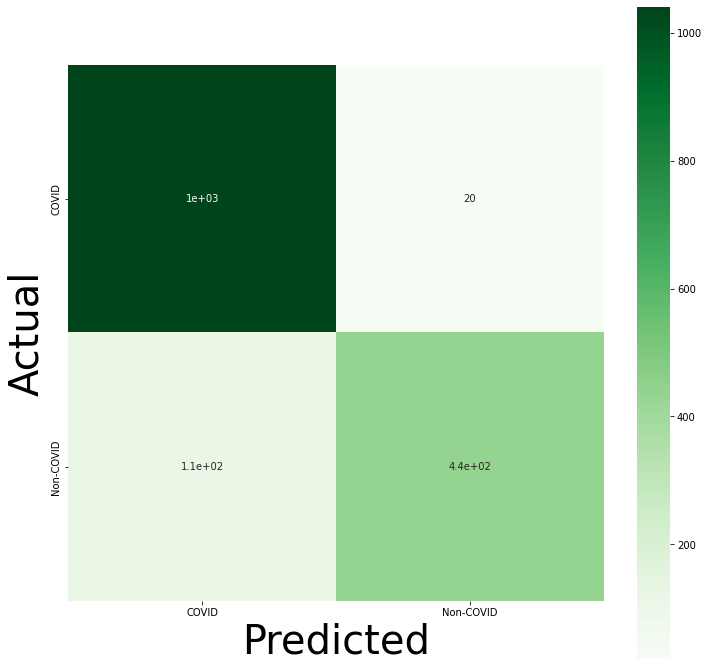

In [ ]:
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

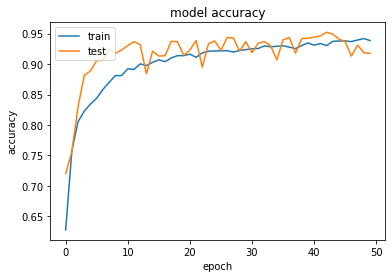

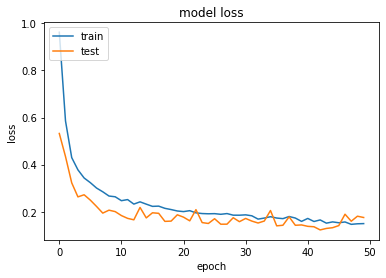

In [ ]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 1s 803ms/step
[0.92889446 0.07110551]


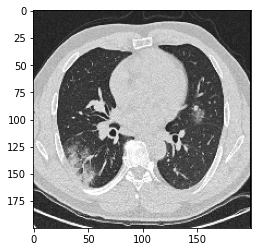

Prediction: Covid-19


In [ ]:
from skimage import io
import keras.utils as image
#path='imbalanced/Scratch/Scratch_400.jpg'
img = image.load_img('/content/covid-19-xray-and-ct-scan-image-dataset/COVID-19-Dataset/CT/COVID/017.jpeg', grayscale=False, target_size=(64, 64))
show_img=image.load_img('/content/covid-19-xray-and-ct-scan-image-dataset/COVID-19-Dataset/CT/COVID/017.jpeg', grayscale=False, target_size=(200, 200))
disease_class=['Covid-19','Non Covid-19']
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255

custom = model.predict(x)
print(custom[0])

plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',disease_class[ind])